In [1]:
# Python Tweet Data Analysis
# Load base packages

import pandas as pd

import numpy as np
# Load other key packages

import scipy as sp
import seaborn as sns

import matplotlib.pyplot as plt
# Load tweet data packages

from textblob import TextBlob
import sys, tweepy
from tweepy.auth import OAuthHandler
from tweepy import API
import matplotlib.pyplot as plt

print("Packages Succesfully Imported")
# Create function (that will be used later)

def percentage(part, whole): 
    return 100 * float(part)/float(whole)
# Pass tweet api credentials

consumerKey = "rehHagu6gJho85oFtGVQzZpUa"
consumerSecret = "0ShQ8hJzPwSEOYiu0u1QLLD2jHYzJhzwJnyo2wpKyHrwjDPmBG"
accessToken = "305201900-4XI5uGsLucYjksazjaJO0h3hdvMKcgKe8mM1A968"
accessTokenSecret = "gEjlnSo8Tvp1QvuBiHbLW1AClibzrAu4zXR9mQkxfHz3S"


Packages Succesfully Imported


In [2]:
# Pass consumer key and consumer secret as the parameters

auth = OAuthHandler(consumer_key = consumerKey, consumer_secret = consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = API(auth)
# How many terms and tweets will we analyse - input

searchTerm = input("Enter hashtag to search about: ")

noOfSearchTerms = int(input("Enter how many tweets to analyze: "))
# Specify the tweet search parameters, including tweet language 

tweets = tweepy.Cursor(api.search, q=searchTerm, lang="English").items(noOfSearchTerms)
# Set the polarity scores (for tweet sentiment)

positive = 0 
negative = 0 
neutral = 0 
polarity = 0


In [3]:
# Python Tweet Data Analysis

# Load base packages
import pandas as pd
import numpy as np

# Load other key packages
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

# Load tweet data packages
from textblob import TextBlob
import sys, tweepy
from tweepy.auth import OAuthHandler
from tweepy import API
import matplotlib.pyplot as plt
print("Packages Succesfully Imported")

# Create function (that will be used later)
def percentage(part, whole): 
    return 100 * float(part)/float(whole)

# Pass tweet api credentials
consumerKey = "rehHagu6gJho85oFtGVQzZpUa"
consumerSecret = "0ShQ8hJzPwSEOYiu0u1QLLD2jHYzJhzwJnyo2wpKyHrwjDPmBG"
accessToken = "305201900-4XI5uGsLucYjksazjaJO0h3hdvMKcgKe8mM1A968"
accessTokenSecret = "gEjlnSo8Tvp1QvuBiHbLW1AClibzrAu4zXR9mQkxfHz3S"

# Pass consumer key and consumer secret as the parameters
auth = OAuthHandler(consumer_key = consumerKey, consumer_secret = consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = API(auth)

# How many terms and tweets will we analyse - input
searchTerm = input("Enter hashtag to search about: ")
noOfSearchTerms = int(input("Enter how many tweets to analyze: "))

# Specify the tweet search parameters, including tweet language 
tweets = tweepy.Cursor(api.search, q=searchTerm, lang="English").items(noOfSearchTerms)

# Set the polarity scores (for tweet sentiment)
positive = 0 
negative = 0 
neutral = 0 
polarity = 0

for tweet in tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity

    if(analysis.sentiment.polarity == 0):
        neutal += 1
    elif(analysis.sentiment.polarity < 0.00):
        negative += 1
    elif(analysis.sentiment.polarity > 0.00):
        positive += 1

positive = percentage(positive, noOfSearchTerms)
negative = percentage(negative, noOfSearchTerms)
neutral = percentage(neutral, noOfSearchTerms)

positive = format(positive, '.2f')
neutral = format(neutral, '.2f')
negative = format(negative, '.2f')

print("How people are reacting on " + searchTerm + "by analyzing " + str(noOfSearchTerms) + " Tweets.")

if(polarity == 0):
    print("Neutral")
elif(polarity < 0):
    print("Negative")
elif(polarity > 0):
    print("Positive")

labels = ['Positive ['+str(positive)+'%]', 'Neutral [' + str(neutral) + '%']','Negative [' + str(negative) + '%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('How people are reacting on '+searchTerm+' by analyzing '+str(noOfSearchTerms)+' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (<ipython-input-3-69181381fccb>, line 77)

Packages Succesfully Imported
How people are reacting on BLMby analyzing 300 Tweets.
Neutral


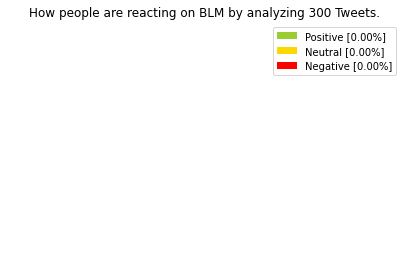

In [4]:
# Python Tweet Data Analysis

# Load base packages
import pandas as pd
import numpy as np

# Load other key packages
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

# Load tweet data packages
from textblob import TextBlob
import sys, tweepy
from tweepy.auth import OAuthHandler
from tweepy import API
import matplotlib.pyplot as plt
print("Packages Succesfully Imported")

# Create function (that will be used later)
def percentage(part, whole): 
    return 100 * float(part)/float(whole)

# Pass tweet api credentials
consumerKey = "rehHagu6gJho85oFtGVQzZpUa"
consumerSecret = "0ShQ8hJzPwSEOYiu0u1QLLD2jHYzJhzwJnyo2wpKyHrwjDPmBG"
accessToken = "305201900-4XI5uGsLucYjksazjaJO0h3hdvMKcgKe8mM1A968"
accessTokenSecret = "gEjlnSo8Tvp1QvuBiHbLW1AClibzrAu4zXR9mQkxfHz3S"

# Pass consumer key and consumer secret as the parameters
auth = OAuthHandler(consumer_key = consumerKey, consumer_secret = consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = API(auth)

# How many terms and tweets will we analyse - input
searchTerm = input("Enter hashtag to search about: ")
noOfSearchTerms = int(input("Enter how many tweets to analyze: "))

# Specify the tweet search parameters, including tweet language 
tweets = tweepy.Cursor(api.search, q=searchTerm, lang="English").items(noOfSearchTerms)

# Set the polarity scores (for tweet sentiment)
positive = 0 
negative = 0 
neutral = 0 
polarity = 0

for tweet in tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity

    if(analysis.sentiment.polarity == 0):
        neutal += 1
    elif(analysis.sentiment.polarity < 0.00):
        negative += 1
    elif(analysis.sentiment.polarity > 0.00):
        positive += 1

positive = percentage(positive, noOfSearchTerms)
negative = percentage(negative, noOfSearchTerms)
neutral = percentage(neutral, noOfSearchTerms)

positive = format(positive, '.2f')
neutral = format(neutral, '.2f')
negative = format(negative, '.2f')

print("How people are reacting on " + searchTerm + "by analyzing " + str(noOfSearchTerms) + " Tweets.")

if(polarity == 0):
    print("Neutral")
elif(polarity < 0):
    print("Negative")
elif(polarity > 0):
    print("Positive")

labels = ['Positive ['+str(positive)+'%]', 'Neutral [' + str(neutral) + '%]', 'Negative [' + str(negative) + '%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('How people are reacting on '+searchTerm+' by analyzing '+str(noOfSearchTerms)+' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()
